In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def serie_de_fourier(f, n, intervalo=(-np.pi, np.pi)):
    """
    Calcula la serie de Fourier truncada de orden n para una función f periódica en [-π, π].

    Parámetros:
    - f: función a aproximar
    - n: orden de la serie
    - intervalo: tupla (a, b), normalmente (-π, π)

    Retorna:
    - f_aprox(x): función aproximada
    - expresión: cadena simbólica de la serie
    """
    a, b = intervalo
    L = (b - a) / 2

    # Coeficiente a0
    a0 = (1 / (2 * L)) * quad(lambda x: f(x), a, b)[0]

    ak = []
    bk = []

    for k in range(1, n + 1):
        ak_val = (1 / L) * quad(lambda x: f(x) * np.cos(k * np.pi * x / L), a, b)[0]
        bk_val = (1 / L) * quad(lambda x: f(x) * np.sin(k * np.pi * x / L), a, b)[0]
        ak.append(ak_val)
        bk.append(bk_val)

    def f_aprox(x_eval):
        result = a0 * np.ones_like(x_eval)
        for k in range(1, n + 1):
            result += ak[k-1] * np.cos(k * np.pi * x_eval / L)
            result += bk[k-1] * np.sin(k * np.pi * x_eval / L)
        return result

    # Crear la expresión simbólica (como texto)
    expr = f"{a0:.4f}"
    for k in range(1, n + 1):
        expr += f" + ({ak[k-1]:.4f})*cos({k}πx/L)"
        expr += f" + ({bk[k-1]:.4f})*sin({k}πx/L)"

    return f_aprox, expr


Serie de Fourier aproximada:
f(x) ≈ 0.0000 + (0.0000)*cos(1πx/L) + (1.2732)*sin(1πx/L) + (0.0000)*cos(2πx/L) + (0.0000)*sin(2πx/L) + (0.0000)*cos(3πx/L) + (0.4244)*sin(3πx/L) + (0.0000)*cos(4πx/L) + (0.0000)*sin(4πx/L) + (0.0000)*cos(5πx/L) + (0.2546)*sin(5πx/L) + (0.0000)*cos(6πx/L) + (0.0000)*sin(6πx/L) + (0.0000)*cos(7πx/L) + (0.1819)*sin(7πx/L) + (0.0000)*cos(8πx/L) + (-0.0000)*sin(8πx/L) + (0.0000)*cos(9πx/L) + (0.1415)*sin(9πx/L) + (0.0000)*cos(10πx/L) + (-0.0000)*sin(10πx/L)


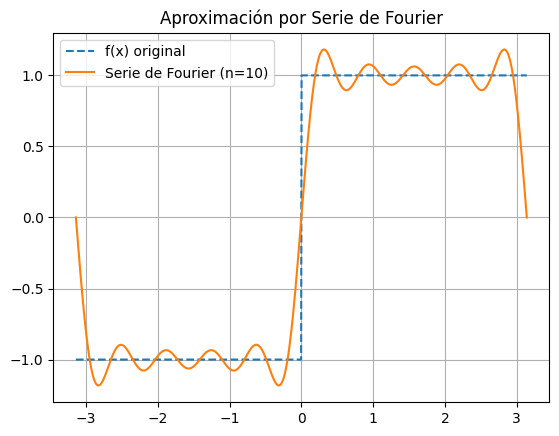

In [4]:
# Función a aproximar (función escalón por ejemplo)
def f(x):
    return np.where(x < 0, -1, 1)

# Calcular serie de Fourier de orden n
n = 10
f_aprox, expr = serie_de_fourier(f, n)

# Mostrar expresión
print("Serie de Fourier aproximada:")
print("f(x) ≈", expr)

# Graficar
x_vals = np.linspace(-np.pi, np.pi, 1000)
plt.plot(x_vals, f(x_vals), label="f(x) original", linestyle='--')
plt.plot(x_vals, f_aprox(x_vals), label=f"Serie de Fourier (n={n})")
plt.title("Aproximación por Serie de Fourier")
plt.grid(True)
plt.legend()
plt.show()
